In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [101]:
df= sns.load_dataset('iris')

In [102]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le = LabelEncoder()

In [105]:
df['species']=le.fit_transform(df['species'])

In [108]:
df=df.loc[df['species']!=0].loc[:,['sepal_length','sepal_width','species']]

In [109]:
df.head()

,sepal_length,sepal_width,species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [110]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x.shape

(100, 2)

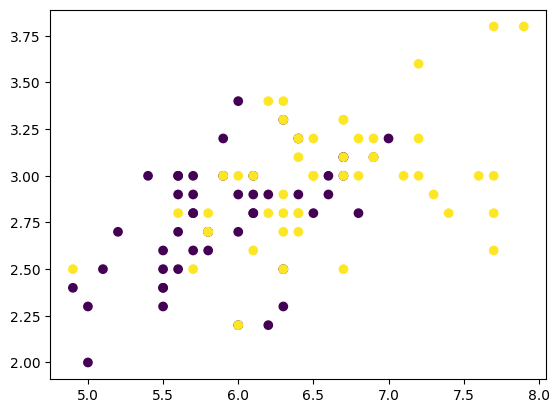

In [111]:
plt.scatter(x[:,0],x[:,1],c=y)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [113]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [153]:
estimators = [
               ('LogisticRegression :',clf1 ),
               ('RandomForest :',clf2), 
               ('knn:',clf3)
               ]

In [154]:
for clf in estimators:
    c=cross_val_score(clf[1],x,y,cv=10)
    score=np.round(np.mean(c),2)
    print(f"{clf[0]} : {score}")

LogisticRegression : : 0.75
RandomForest : : 0.6
knn: : 0.62


In [116]:
from sklearn.ensemble import VotingClassifier

Hard Voting

In [155]:
vc = VotingClassifier(estimators=estimators,voting='hard')
c=cross_val_score(vc,x,y,cv=10)
np.round(np.mean(c),2)


0.68

In [156]:
vc = VotingClassifier(estimators=estimators,voting='soft')
c=cross_val_score(vc,x,y,cv=10)
np.round(np.mean(c),2)


0.65

In [119]:
xx=np.linspace(np.min(x[:,0]),np.max(x[:,0]),100)
yy=np.linspace(np.min(x[:,1]),np.max(x[:,1]),100)

xx,yy = np.meshgrid(xx,yy)

In [121]:
vc.fit(x,y)

VotingClassifier(estimators=[('LogisticRegression :', LogisticRegression()),
                             ('RandomForest :', RandomForestClassifier()),
                             ('knn:', KNeighborsClassifier())],
                 voting='soft')

In [123]:
z=vc.predict(np.stack([xx.ravel(),yy.ravel()],axis=1))
z=z.reshape(xx.shape)

In [151]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['lightgrey', 'lightgreen'])
cmap2 = ListedColormap(['darkorange', 'darkblue'])

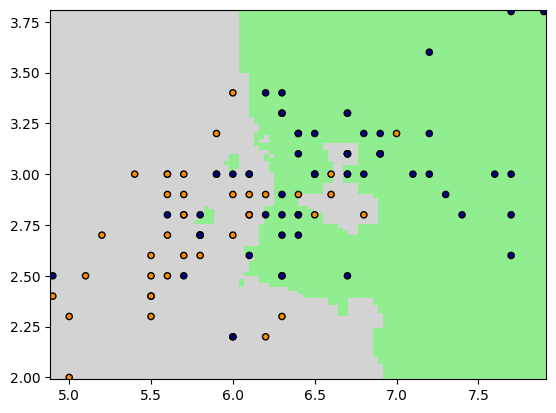

In [152]:
plt.pcolormesh(xx,yy,z,cmap=cmap1)
plt.scatter(x[:,0],x[:,1],c=y,cmap=cmap2, edgecolor='k', s=20)

In [89]:
from sklearn.datasets import make_classification

In [90]:
x,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

In [91]:
from sklearn.svm import SVC

In [92]:
svm1= SVC(probability=True,kernel='poly',degree=1)
svm2= SVC(probability=True,kernel='poly',degree=2)
svm3= SVC(probability=True,kernel='poly',degree=3)
svm4= SVC(probability=True,kernel='poly',degree=4)
svm5= SVC(probability=True,kernel='poly',degree=5)

In [93]:
estimators=[
    ('svm1',svm1),
    ('svm2',svm2),
    ('svm3',svm3),
    ('svm4',svm4),
    ('svm5',svm5),
            ]

In [94]:
for e in estimators:
    c = cross_val_score(e[1],x,y,cv=10)
    score = np.round(np.mean(c),2)
    print(f'{e[0]} : {score}')

svm1 : 0.85
svm2 : 0.85
svm3 : 0.89
svm4 : 0.81
svm5 : 0.86


In [95]:
from sklearn.ensemble import VotingClassifier

In [96]:
vc = VotingClassifier(estimators=estimators,voting='soft')

In [97]:
c = cross_val_score(vc,x,y,cv=10)
score = np.round(np.mean(c),2)
score

0.93

The combine model actually is better than individual models